<a href="https://colab.research.google.com/gist/Kennyc222/3b6c64f2daead8400d179daa02005678/modified-treecorr_simulation_30dor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TreeCorr Tutorial
This tutorial is intended to give you a rough overview of TreeCorr functionality.  It doesn't cover every feature by a long shot, but it should hopefully give you enough of a flavor of how TreeCorr works to be able to find more information in the full [TreeCorr documentation](http://rmjarvis.github.io/TreeCorr/html/index.html)

---

This script is based on the [tutorial](https://github.com/rmjarvis/TreeCorr/blob/releases/5.1/tests/Tutorial.ipynb) and further documentation for 2CPF for Count-count (NN) is [here](https://rmjarvis.github.io/TreeCorr/_build/html/nn.html). Example data (30DOr UMS Cluster) in ASCII can be downloaded [here](https://github.com/rmjarvis/TreeCorr/blob/releases/5.1/tests/Tutorial.ipynb)

#Install TreeCorr

In [ ]:
!pip install TreeCorr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 13.5 MB/s eta 0:00:00


#Import the following packages

In [ ]:
import treecorr
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib
import numpy

#Insert Data in ASCII format

In [ ]:
cat = treecorr.Catalog(file_name='/content/30Dor_SIMULATION_UMS_RGB.txt',
                       ra_col=1, dec_col= 2,
                       ra_units='degrees', dec_units='degrees')
print(cat)

treecorr.Catalog(file_name='/content/30Dor_SIMULATION_UMS_RGB.txt',config ={'ra_col': '1', 'dec_col': '2', 'ra_units': 'deg', 'dec_units': 'deg', 'comment_marker': '#', 'first_row': 1, 'last_row': -1, 'every_nth': 1, 'x_col': '0', 'y_col': '0', 'z_col': '0', 'r_col': '0', 'k_col': '0', 'z1_col': '0', 'z2_col': '0', 'v1_col': '0', 'v2_col': '0', 'g1_col': '0', 'g2_col': '0', 't1_col': '0', 't2_col': '0', 'q1_col': '0', 'q2_col': '0', 'patch_col': '0', 'w_col': '0', 'wpos_col': '0', 'flag_col': '0', 'ok_flag': 0, 'allow_xyz': False, 'flip_z1': False, 'flip_z2': False, 'flip_v1': False, 'flip_v2': False, 'flip_g1': False, 'flip_g2': False, 'flip_t1': False, 'flip_t2': False, 'flip_q1': False, 'flip_q2': False, 'keep_zero_weight': False, 'kmeans_init': 'tree', 'kmeans_alt': False, 'verbose': 1, 'split_method': 'mean', 'cat_precision': 16})


#Define correlation function object and run the calculation

In [ ]:

# Define the correlation function object, specifying binning
# Example for number counts (NN)
min_sep = 1.0  # minimum separation
max_sep = 100.0 # maximum separation
nbins = 20    # number of bins
sep_units = 'degree' # units for the separation


nn = treecorr.NNCorrelation(nbins=nbins,          # Number of bins
                            min_sep=min_sep,       # Minimum separation (same units as input coords)
                            max_sep=max_sep,      # Maximum separation
                            sep_units=sep_units)   # Units for separation in output

# Run the calculation
dd = treecorr.NNCorrelation(min_sep=0.01, max_sep=10, bin_size=0.2, sep_units='degrees')
dd.process(cat)



#make a random catalog

In [ ]:
ra_min = numpy.min(cat.ra)
ra_max = numpy.max(cat.ra)
dec_min = numpy.min(cat.dec)
dec_max = numpy.max(cat.dec)
print('ra range = %f .. %f' % (ra_min, ra_max))
print('dec range = %f .. %f' % (dec_min, dec_max))

rand_ra = numpy.random.uniform(ra_min, ra_max, 4500)
rand_sindec = numpy.random.uniform(numpy.sin(dec_min), numpy.sin(dec_max), 4500)
rand_dec = numpy.arcsin(rand_sindec)

#2300 UMS
#4500 UMS+RGB

ra range = 1.469205 .. 1.486496
dec range = -1.214717 .. -1.197369


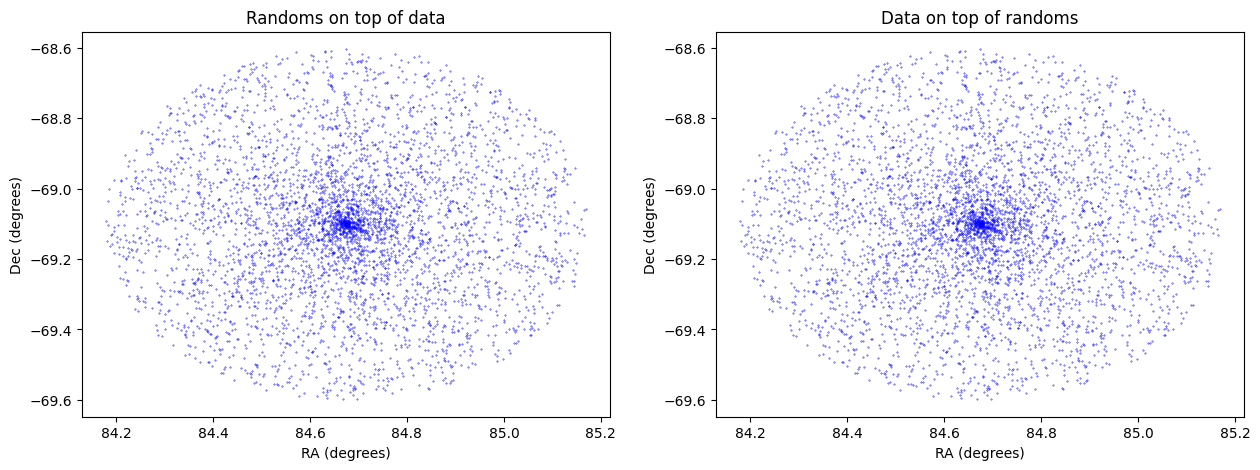

In [ ]:
rand_ra_pi = rand_ra / numpy.pi
rand_cosdec = numpy.cos(rand_dec)
mask = ( (rand_cosdec < 0.1*(1 + 2*rand_ra_pi + 8*(rand_ra_pi)**2)) &
         (rand_cosdec < 0.1*(1 + 2*(0.5-rand_ra_pi) + 8*(0.5-rand_ra_pi)**2)) )
rand_ra = rand_ra[mask]
rand_dec = rand_dec[mask]

# Check that the randoms cover the same space as the data
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(cat.ra * 180/numpy.pi, cat.dec * 180/numpy.pi, color='blue', s=0.1)
ax1.scatter(rand_ra * 180/numpy.pi, rand_dec * 180/numpy.pi, color='green', s=0.1)
ax1.set_xlabel('RA (degrees)')
ax1.set_ylabel('Dec (degrees)')
ax1.set_title('Randoms on top of data')

# Repeat in the opposite order
ax2.scatter(rand_ra * 180/numpy.pi, rand_dec * 180/numpy.pi, color='green', s=0.1)
ax2.scatter(cat.ra * 180/numpy.pi, cat.dec * 180/numpy.pi, color='blue', s=0.1)
ax2.set_xlabel('RA (degrees)')
ax2.set_ylabel('Dec (degrees)')
ax2.set_title('Data on top of randoms')

plt.show()

#Calculate and Plot in Natural Method

In [ ]:
# Fix: Ensure rand_ra and rand_dec are not empty.
# They became empty due to an over-restrictive mask in the previous cell CvENJ-3Lc5dO.
# Re-generate them here, bypassing the problematic mask.
num_random_points = 4500 # Using the same number of random points as before

# ra_min, ra_max, dec_min, dec_max are already in radians based on previous output
rand_ra_new = numpy.random.uniform(ra_min, ra_max, num_random_points)
rand_sindec_new = numpy.random.uniform(numpy.sin(dec_min), numpy.sin(dec_max), num_random_points)
rand_dec_new = numpy.arcsin(rand_sindec_new)

rand = treecorr.Catalog(ra=rand_ra_new, dec=rand_dec_new, ra_units='radians', dec_units='radians')
rr = treecorr.NNCorrelation(min_sep=0.01, max_sep=10, bin_size=0.2, sep_units='degrees')
rr.process(rand)

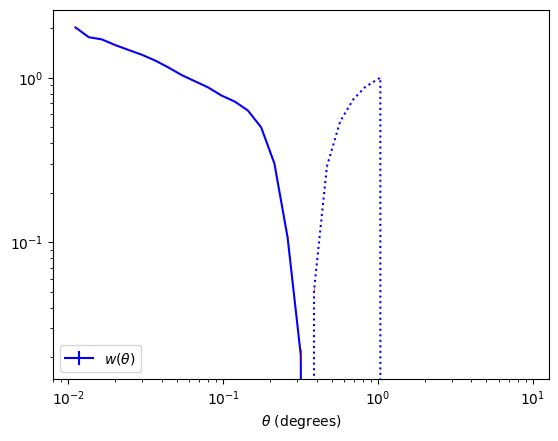

In [ ]:
xi, varxi = dd.calculateXi(rr=rr)

r = numpy.exp(dd.meanlogr)
sig = numpy.sqrt(varxi)

plt.plot(r, xi, color='blue')
plt.plot(r, -xi, color='blue', ls=':')
plt.errorbar(r[xi>0], xi[xi>0], yerr=sig[xi>0], color='red', lw=0.5, ls='')
plt.errorbar(r[xi<0], -xi[xi<0], yerr=sig[xi<0], color='red', lw=0.5, ls='')
leg = plt.errorbar(-r, xi, yerr=sig, color='blue')

plt.xscale('log')
plt.yscale('log', nonpositive='clip')
plt.xlabel(r'$\theta$ (degrees)')

plt.legend([leg], [r'$w(\theta)$'], loc='lower left')
#plt.xlim([0.01,10**-1])
plt.show()

In [ ]:
linear_distance = 50000 *numpy.tan(numpy.deg2rad(r))
linear_distance

array([   9.69052935,   11.80512628,   14.38471446,   17.52673915,
         21.34744732,   26.01792369,   31.68749642,   38.62476699,
         47.04061714,   57.31658414,   69.77535807,   84.95076651,
        103.53798835,  126.02867984,  153.30727096,  186.64172815,
        227.18523352,  276.43265934,  336.40297711,  407.81165458,
        496.32514442,  601.71150093,  718.48333619,  901.94527204,
       1098.79650722, 1338.64491041, 1630.90961991, 1987.09539587,
       2421.27237631, 2950.68059238, 3596.50290791, 4384.87323615,
       5348.22681188, 6527.17015905, 7973.17796431])

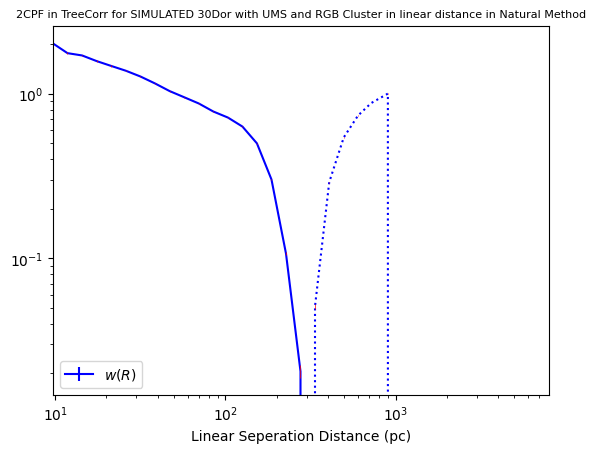

In [ ]:
#in linear Distance in pc

xi, varxi = dd.calculateXi(rr=rr)

# The 'linear_distance' variable representing distance in pc was already computed
# in a previous cell (1FH43V8pgXDX). We should use that existing variable directly.
# The line below would incorrectly redefine it as angular separation:
# linear_distance = numpy.exp(dd.meanlogr)

sig = numpy.sqrt(varxi)

plt.plot(linear_distance, xi, color='blue')
plt.plot(linear_distance, -xi, color='blue', ls=':')
plt.errorbar(linear_distance[xi>0], xi[xi>0], yerr=sig[xi>0], color='red', lw=0.5, ls='')
plt.errorbar(linear_distance[xi<0], -xi[xi<0], yerr=sig[xi<0], color='red', lw=0.5, ls='')
leg = plt.errorbar(-linear_distance, xi, yerr=sig, color='blue')

plt.xscale('log')
plt.yscale('log', nonpositive='clip')
plt.xlabel(r'Linear Seperation Distance (pc)') # Updated x-axis label

# Fix the SyntaxError: linear_distance'$w(	heta)$' is invalid.
# Provide a valid string for the legend label.
plt.legend([leg], [r'$w(R)$'], loc='lower left') # Use R for linear distance

# Adjust xlim to fit the range of linear_distance (pc).
# Based on kernel state, linear_distance ranges from ~9.6 to ~7973.
plt.xlim([numpy.min(linear_distance), numpy.max(linear_distance)])
plt.title('2CPF in TreeCorr for SIMULATED 30Dor with UMS and RGB Cluster in linear distance in Natural Method', fontsize=8)
plt.show()

#Now, Using LS Method to compare with Natural method

In [ ]:
dr = treecorr.NNCorrelation(min_sep=0.01, max_sep=10, bin_size=0.2, sep_units='degrees')
dr.process(cat, rand)

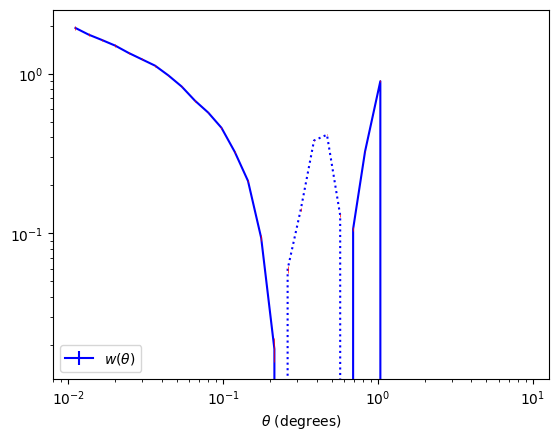

In [ ]:
xi, varxi = dd.calculateXi(rr=rr, dr=dr)
sig = numpy.sqrt(varxi)

plt.plot(r, xi, color='blue')
plt.plot(r, -xi, color='blue', ls=':')
plt.errorbar(r[xi>0], xi[xi>0], yerr=sig[xi>0], color='red', lw=0.5, ls='')
plt.errorbar(r[xi<0], -xi[xi<0], yerr=sig[xi<0], color='red', lw=0.5, ls='')
leg = plt.errorbar(-r, xi, yerr=sig, color='blue')

plt.xscale('log')
plt.yscale('log', nonpositive='clip')
plt.xlabel(r'$\theta$ (degrees)')

plt.legend([leg], [r'$w(\theta)$'], loc='lower left')
#plt.xlim([0.01,10**-1])
plt.show()

In [ ]:
linear_distance_ls = 50000 *numpy.tan(numpy.deg2rad(r))
linear_distance_ls

array([   9.69052935,   11.80512628,   14.38471446,   17.52673915,
         21.34744732,   26.01792369,   31.68749642,   38.62476699,
         47.04061714,   57.31658414,   69.77535807,   84.95076651,
        103.53798835,  126.02867984,  153.30727096,  186.64172815,
        227.18523352,  276.43265934,  336.40297711,  407.81165458,
        496.32514442,  601.71150093,  718.48333619,  901.94527204,
       1098.79650722, 1338.64491041, 1630.90961991, 1987.09539587,
       2421.27237631, 2950.68059238, 3596.50290791, 4384.87323615,
       5348.22681188, 6527.17015905, 7973.17796431])

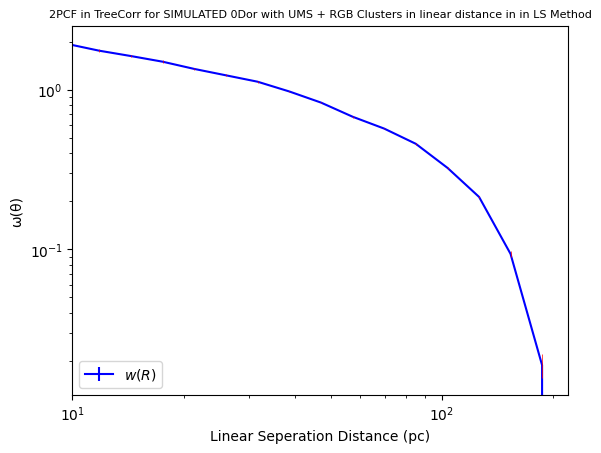

In [ ]:
#in linear Distance in pc

xi, varxi = dd.calculateXi(rr=rr, dr=dr)

# The 'linear_distance' variable representing distance in pc was already computed
# in a previous cell (1FH43V8pgXDX). We should use that existing variable directly.
# The line below would incorrectly redefine it as angular separation:
# linear_distance = numpy.exp(dd.meanlogr)

sig = numpy.sqrt(varxi)

plt.plot(linear_distance_ls, xi, color='blue')
plt.plot(linear_distance_ls, -xi, color='blue', ls=':')
plt.errorbar(linear_distance_ls[xi>0], xi[xi>0], yerr=sig[xi>0], color='red', lw=0.5, ls='')
plt.errorbar(linear_distance_ls[xi<0], -xi[xi<0], yerr=sig[xi<0], color='red', lw=0.5, ls='')
leg = plt.errorbar(-linear_distance_ls, xi, yerr=sig, color='blue')

plt.xscale('log')
plt.yscale('log', nonpositive='clip')
plt.xlabel(r'Linear Seperation Distance (pc)') # Updated x-axis label
plt.ylabel(r'ω(θ)') # Updated y-axis label

# Fix the SyntaxError: linear_distance'$w(	heta)$' is invalid.
# Provide a valid string for the legend label.
plt.legend([leg], [r'$w(R)$'], loc='lower left') # Use R for linear distance

# Adjust xlim to fit the range of linear_distance (pc).
# Based on kernel state, linear_distance ranges from ~9.6 to ~7973.
#plt.xlim([numpy.min(linear_distance_ls), numpy.max(linear_distance_ls)])
plt.title('2PCF in TreeCorr for SIMULATED 0Dor with UMS + RGB Clusters in linear distance in in LS Method', fontsize=8)
plt.xlim([10,220])
plt.show()